# Homework 1

Due date: Wednesday, September 22 at midnight.

## Guidelines
* Answer in the cells immediately below the problem statements. If a problem calls for code, a code cell will follow. If a problem calls for a text response, a Markdown cell will follow.
* Your code should include some comments. Insufficient commentary may result in loss of points. But you do not necessarily need to comment every line or problem. Further guidelines:
    - If the the meaning of some line of code would be obvious to the average Python novice, you do not need to comment (e.g., you do not need to comment _import numpy_). 
    - If your code is moderately complex, you should comment (e.g., if you nest several functions in one line, you should comment). 
    - It may be proper to comment before a code block to describe generally what you are doing (e.g., you should comment before a function definition to explain the function and its parameters).

# Problem 1

## 1.1
Load the _lowbwt_ dataset from the OpenML repository as a Pandas DataFrame from following URL: https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff. Use a function that is able to handle loading the data directly into Jupyter from the URL. The function should take the URL as an argument. **Do not load the data using a filepath on your hard drive:** again, load the data directly into Jupyter using the URL.

Print the loaded DataFrame. Read the [description](https://www.openml.org/d/203) of the dataset to better understand it. Check the column names and values to see if they match the variables discussed in the description. One or more variables may have been renamed.

In [1]:
import pandas as pd
data = pd.read_csv('https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff')

# Birth Weight in Grams (BWT) has been renamed as class
print(data)

     LOW  AGE  LWT  RACE  SMOKE  PTL  HT  UI  FTV  class
0      0   19  182     2      0    0   0   1    0   2523
1      0   33  155     3      0    0   0   0    3   2551
2      0   20  105     1      1    0   0   0    1   2557
3      0   21  108     1      1    0   0   1    2   2594
4      0   18  107     1      1    0   0   1    0   2600
5      0   21  124     3      0    0   0   0    0   2622
6      0   22  118     1      0    0   0   0    1   2637
7      0   17  103     3      0    0   0   0    1   2637
8      0   29  123     1      1    0   0   0    1   2663
9      0   26  113     1      1    0   0   0    0   2665
10     0   19   95     3      0    0   0   0    0   2722
11     0   19  150     3      0    0   0   0    1   2733
12     0   22   95     3      0    0   1   0    0   2750
13     0   30  107     3      0    1   0   1    2   2750
14     0   18  100     1      1    0   0   0    0   2769
15     0   18  100     1      1    0   0   0    0   2769
16     0   15   98     2      0

## 1.2
From the full DataFrame, extract and print a DataFrame with the birthweight column (and only the birthweight column) for mothers who smoked during pregnancy and had low-birthweight deliveries.

In [2]:
# select indices for mothers who smoked during pregnancy and had low-birthweight deliveries.
indices = ((data["LOW"] == 1) & (data["SMOKE"] == 1))
low_birthweight_who_smoked = data["class"][indices]
low_birthweight_who_smoked

130     709
132    1135
139    1790
140    1818
141    1885
144    1928
145    1928
147    1936
152    2084
153    2084
155    2125
156    2126
157    2187
159    2211
160    2225
164    2296
165    2296
168    2353
170    2367
171    2381
172    2381
175    2410
176    2410
177    2414
178    2424
182    2466
183    2466
184    2466
186    2495
188    2495
Name: class, dtype: int64

## 1.3
Print the following statistics for the birthweights in the original full dataset:
- Standard deviation
- 0.16 Quantile
- Mean
- Median
- 0.84 Quantile

Afterwards, print the same statistics for the birthweights in the subset you selected in 1.2.

In [3]:
# def a function to calculate all the statistics
def statistics(dataframe):
    std = dataframe.std()
    mean = dataframe.mean()
    quantiles = dataframe.quantile([0.16,0.5,0.84])
    print("std: {}, 0.16 quantile: {}, mean: {}, median: {}, 0.84 quantile: {}".format(std, quantiles[0.16], mean, quantiles[0.5], quantiles[0.84]))

In [4]:
origin_birthweight = data["class"]
print("The statistics for the birthweights in the original full dataset\n")
statistics(origin_birthweight)

The statistics for the birthweights in the original full dataset

std: 729.0224168601321, 0.16 quantile: 2226.2, mean: 2944.6560846560847, median: 2977.0, 0.84 quantile: 3695.159999999999


In [5]:
print("The statistics for the birthweights in the subset in 1.2\n")
statistics(low_birthweight_who_smoked)

The statistics for the birthweights in the subset in 1.2

std: 399.8074090956996, 0.16 quantile: 1912.52, mean: 2143.0333333333333, median: 2260.5, 0.84 quantile: 2439.12


## 1.4
Plot two density histograms: one for the birthweights in the full dataset, and one for the birthweights in the subset you selected in 1.2. Label the histograms.

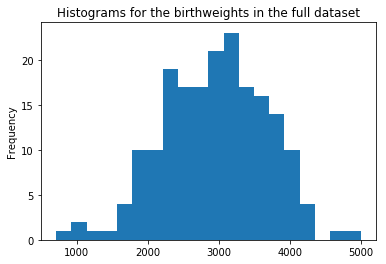

In [8]:
origin_birthweight.plot(kind='hist',title='Histograms for the birthweights in the full dataset', bins = 20)

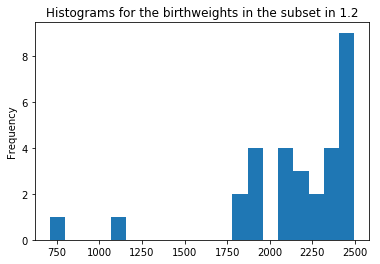

In [9]:
low_birthweight_who_smoked.plot(kind='hist',title='Histograms for the birthweights in the subset in 1.2', bins = 20)

## 1.5
Is a normal distribution a plausible model for birthweight in either of the two datasets? Back up your answer using the previous results. This image of a normal PDF may be useful:


![Normal PDF](bell-curve.jpg)

### _Answer:_

A normal distribution may be a plausible model for the birthweights in the full dataset.

# Problem 2
In this exercise, we will proceed in steps to perform rejection sampling of a [beta random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) using a [triangular random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html) as candidate.

## 2.1
Plot an overlay of a beta PDF and a triangular PDF with the following parameters:
- For the beta PDF, a=2, b=2, loc=0, scale=1.
- For the triangular PDF, c=0.50, loc=0, scale=1.

In [10]:
import scipy
from scipy.stats import triang
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

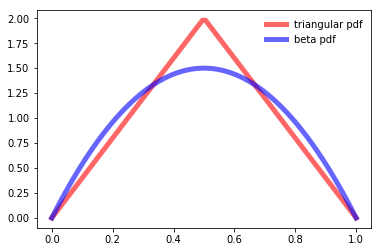

In [11]:
fig, ax = plt.subplots(1, 1)
# for triangular pdf
c = 0.50
x = np.linspace(0, 1, 100)
ax.plot(x, triang.pdf(x, c, loc = 0, scale = 1), 'r-', lw=5, alpha=0.6, label='triangular pdf')

# for beta pdf
a, b = 2, 2
ax.plot(x, beta.pdf(x, a, b, loc = 0, scale = 1), 'b-', lw=5, alpha=0.6, label='beta pdf')

ax.legend(loc='best', frameon=False)
plt.show() 

## 2.2
We will perform 10,000 trials of the rejection sampling procedure. Simulate and store 10,000 random variables distributed as $\text{Uniform}[0,1]$ using random state 436. Simulate and store 10,000 triangular random variables from the specified triangular distribution using random state 636.

In [12]:
import numpy as np

# 10,000 random variables distributed as  Uniform[0,1]
np.random.seed(436)
uniforms = np.random.uniform(low=0.0, high=1.0, size=10000)

# 10,000 triangular random variables
np.random.seed(636)
triangulars = np.random.triangular(0, 0.5, 1, size = 10000)

## 2.3
Let $f$ be the beta PDF and $g$ the triangular PDF. Using 1.50 as an estimate of $\sup f/g$, generate samples from the beta distribution by rejection sampling. Store your samples. Print the number of samples you obtain.

Let $k = 1.5$, than $f \le k  g$.

In [13]:
# rejection sampling

saved_beta_samples = []
for i in range(10000):
    # sample from the triangular distribution
    sample_tri = triangulars[i]
    # uniform sampling from [0, 1.5 * g(sample_tri)]
    sample_uniform = 1.5 * triang.pdf(sample_tri, c, loc = 0, scale = 1) * uniforms[i]
    if sample_uniform < beta.pdf(sample_tri, a, b, loc = 0, scale = 1):
        saved_beta_samples.append(sample_tri)
        
print("number of samples saved for beta: {}".format(len(saved_beta_samples)))

number of samples saved for beta: 6674


## 2.4
Plot a density histogram of your samples overlaid with the beta and triangular PDFs. Use 100 bins.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


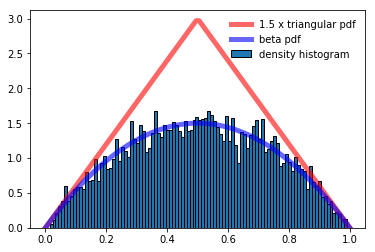

In [14]:
fig, ax = plt.subplots(1, 1)
# for triangular pdf
c = 0.50
x = np.linspace(0, 1, 100)
ax.plot(x, 1.5 * triang.pdf(x, c, loc = 0, scale = 1), 'r-', lw=5, alpha=0.6, label='1.5 x triangular pdf')

# for beta pdf
a, b = 2, 2
ax.plot(x, beta.pdf(x, a, b, loc = 0, scale = 1), 'b-', lw=5, alpha=0.6, label='beta pdf')

plt.hist(saved_beta_samples,bins=100, normed=True, edgecolor='black', label = "density histogram")

ax.legend(loc='best', frameon=False)
plt.show()

# Problem 3

## 3.1
The Epanechnikov kernel is defined by
$$K(u) = \frac{3}{4}\left(1 - u^{2}\right)\qquad\text{for }\lvert u \rvert \leq 1$$
Perform Epanechnikov kernel density estimation on 1,000 simulated samples from a [lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) with s=1 and random state 636. Use a bandwidth of 2.0. Plot the density estimate over the support of the lognormal distribution. (You can use 2 times the maximum of your samples as an upper bound for the support.)

In [15]:
# 1,000 simulated samples from a lognormal distribution
np.random.seed(636)
lognormals = np.random.lognormal(mean = 0, sigma = 1, size = 1000)

In [16]:
def Epanechnikov_kernel_density(x0):
    bias = (lognormals - x0) / 2.0
    bias_cliped = np.clip(bias, -1, 1)
    kernel = 0.75 * (1 - bias_cliped ** 2)
    return kernel.sum() / (2 * len(lognormals))

In [17]:
support = np.sort(lognormals)
predict_density = np.zeros(1000)
for idx in range(1000):
    predict_density[idx] = Epanechnikov_kernel_density(support[idx])
    
# the PDF must be normalized
predict_density /= scipy.integrate.trapz(predict_density, support)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


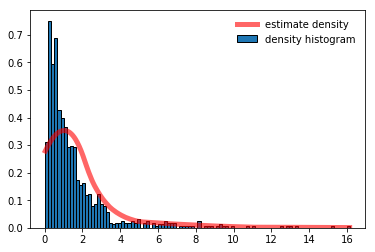

In [18]:
fig, ax = plt.subplots(1, 1)

ax.plot(support, predict_density, 'r-', lw=5, alpha=0.6, label='estimate density')
plt.hist(lognormals,bins=100, normed=True, edgecolor='black', label = "density histogram")

ax.legend(loc='best', frameon=False)
plt.show()

## 3.2
Test whether the estimate integrates to unity over the support of the lognormal distribution.

In [19]:
scipy.integrate.trapz(predict_density, support)

1.0

## 3.3
Explain the results of your integration.

### _Answer:_

As the density was estimated on finite sampled data, the integration will be smaller than 1. Thus we have to normalize it by `scipy.integrate.trapz`

# Problem 4

## 4.1
Below we load the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset). We also store the labels of the predictor variables for you.

Our goal will be to predict house price (MEDV) by regression. Split the dataset into a training and test set using 1/3 as the test size and a random state of 553. Use the function [_train_test_split_](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from _sklearn.model_selection_ for this purpose.

In [20]:
# Loading data:

# Import function for loading the 'boston' dataset.
from sklearn.datasets import load_boston
# Load a 'bunch' containing data and descriptions.
boston_bunch = load_boston()
# Extract and store predictor variables.
X = boston_bunch.data
# Extract and store the variable that is the target for prediction.
y = boston_bunch.target
# Extract and store labels of predictor variables.
labels = boston_bunch.feature_names

In [21]:
labels

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [22]:
# Your code:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3, random_state=553)

## 4.2
Fit three different linear models on the training set by ordinary least squares (OLS): 
- A model using all predictor variables.
- A model using only AGE, NOX, DIS, and RAD as predictor variables.
- A model using all polynomial combinations of degree $\leq 2$ of the original thirteen predictor variables.

In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
model_all_variables = linear_model.LinearRegression()
model_all_variables.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# get  AGE, NOX, DIS, and RAD as sub variables.
X_train_sub = X_train[:, [6, 4, 7, 8]]
model_four_variables = linear_model.LinearRegression()
model_four_variables.fit(X_train_sub, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
# augment the features with PolynomialFeatures
transformed_data = PolynomialFeatures(2).fit_transform(X_train)

In [27]:
model_poly = linear_model.LinearRegression()
model_poly.fit(transformed_data, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 4.3
For model assessment, print the following for each of the three models:
- The $R^{2}$ of the predictions on the training set.
- The $R^{2}$ of the predictions on the test set.
- Predicted MEDV for the first five sample points in the test set.
- True MEDV for the first five sample points in the test set.

In [28]:
print("The R_square of the predictions on the training set for each of the three models\n")
print("model_all_variables: {}, model_four_variables: {}, model_poly: {}".format(r2_score(model_all_variables.predict(X_train), y_train), 
     r2_score(model_four_variables.predict(X_train_sub), y_train), r2_score(model_poly.predict(transformed_data), y_train)))

The R_square of the predictions on the training set for each of the three models

model_all_variables: 0.6955852455841397, model_four_variables: -1.5522962215798466, model_poly: 0.9036520389901588


In [29]:
X_test_sub = X_test[:, [6, 4, 7, 8]]
transformed_test_data = PolynomialFeatures(2).fit_transform(X_test)
print("The R_square of the predictions on the test set for each of the three models\n")
print("model_all_variables: {}, model_four_variables: {}, model_poly: {}".format(r2_score(model_all_variables.predict(X_test), y_test), 
     r2_score(model_four_variables.predict(X_test_sub), y_test), r2_score(model_poly.predict(transformed_test_data), y_test)))

The R_square of the predictions on the test set for each of the three models

model_all_variables: 0.5651168642865123, model_four_variables: -2.048627685966301, model_poly: 0.743768255776068


In [30]:
print("The Predicted MEDV for the first five sample points in the test set.\n")
print("model_all_variables: {}\nmodel_four_variables: {}\nmodel_poly: {}".format(model_all_variables.predict(X_test)[:5], 
                                                                                     model_four_variables.predict(X_test_sub)[:5],
                                                                                     model_poly.predict(transformed_test_data)[:5]))

The Predicted MEDV for the first five sample points in the test set.

model_all_variables: [24.26407162 12.12360834 27.6804514  24.12294704 21.83492858]
model_four_variables: [27.88749751 15.41806533 25.36918791 24.09219392 26.37783049]
model_poly: [25.02070379  9.37744761 30.67200685 17.71519446 21.92936015]


In [31]:
print("True MEDV for the first five sample points in the test set: {}".format(y_test[:5]))

True MEDV for the first five sample points in the test set: [24.6  5.6 27.1 21.9 20. ]


## 4.4
Comment on your results in 4.3, which model do you think is the best? Explain you answer.

### _Answer:_

As the relationship between the target and predictor variables is not linear, poly regression performs best. Besides, using only a few features for linear regression is not enough.

## 4.5
Consider the linear regression model using all original features you built above. Holding all other variables equal, what effect does the model predict that an increase in 0.1 parts per 10 million nitric oxide concentration in a place will have on the median value of of owner-occupied homes in that place? Write code that will return and print the answer.

In [32]:
model_all_variables.coef_

array([-1.08863525e-01,  4.86699529e-02,  6.07055831e-02,  2.40996656e+00,
       -1.65454672e+01,  4.05458142e+00,  1.53059355e-02, -1.24176460e+00,
        3.72495355e-01, -1.52879448e-02, -9.40760323e-01,  1.03095104e-02,
       -5.43391151e-01])

In [33]:
print("It will increase by value {}".format(model_all_variables.coef_[4] * 0.1))

It will increase by value -1.6545467178967308
